### Spatial Filter Basics

In [1]:
import cv2
from PIL import Image
import numpy as np

(688, 688)


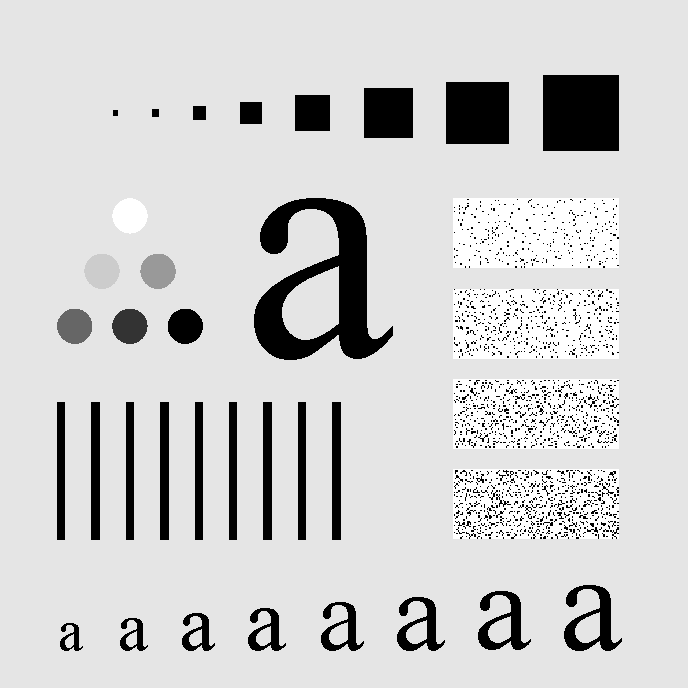

In [2]:
img = cv2.imread('smoothing.tif', 2)
print img.shape
Image.fromarray(img)

### Generic function that does the spatial filtering depending on the filter that is provided

In [3]:
def spatialfilter(img, arrayfilter):
    #imgshow = Image.fromarray(img)
    #imgshow.show()
    
    newimg          = img.copy()
    [height, width] = img.shape
    [filtersize, a] = arrayfilter.shape
    b               = (a-1) / 2 # b is the steps needed to get to the center of the arrayfilter index and like wise
    

    for y in range(height):
        for x in range(width):
            endy = a+y
            endx = a+x
            if endy < height and endx < width: # Taking boundaries into account and ignoring them 
                arraytemp    = np.multiply(arrayfilter, img[y:endy, x:endx])
                newimg[y+b][x+b] = arraytemp.sum()
    
    newimgshow = Image.fromarray(newimg)
    #newimgshow.show()
    return newimgshow
                
        

### Task 1
#### Size 3, 5, 15 and 35 by 35 filters for Effect of averaging and the size of averaging filters

In [4]:
filtersize  = 3
arrayfilter = np.ones((filtersize, filtersize)) * 1/(filtersize*filtersize)

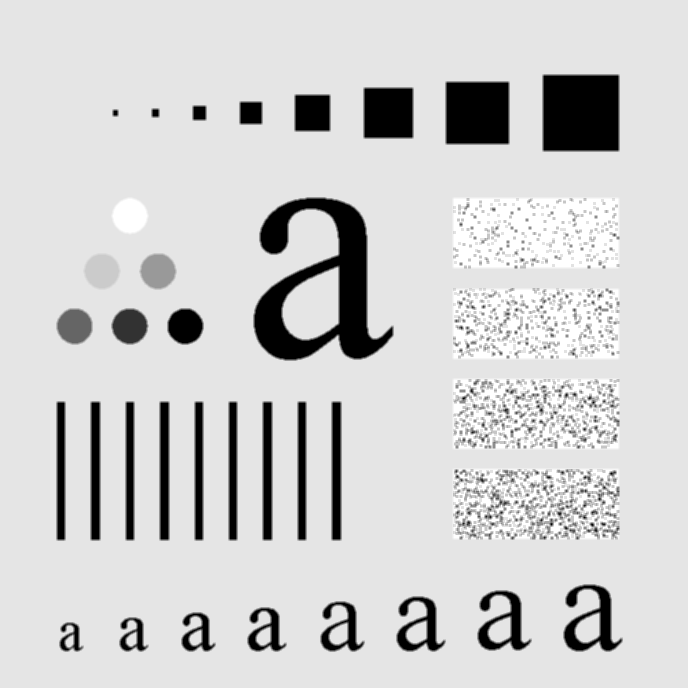

In [5]:
spatialfilter(img, arrayfilter )

In [6]:
filtersize  = 5
arrayfilter = np.ones((filtersize, filtersize)) * 1/(filtersize*filtersize)

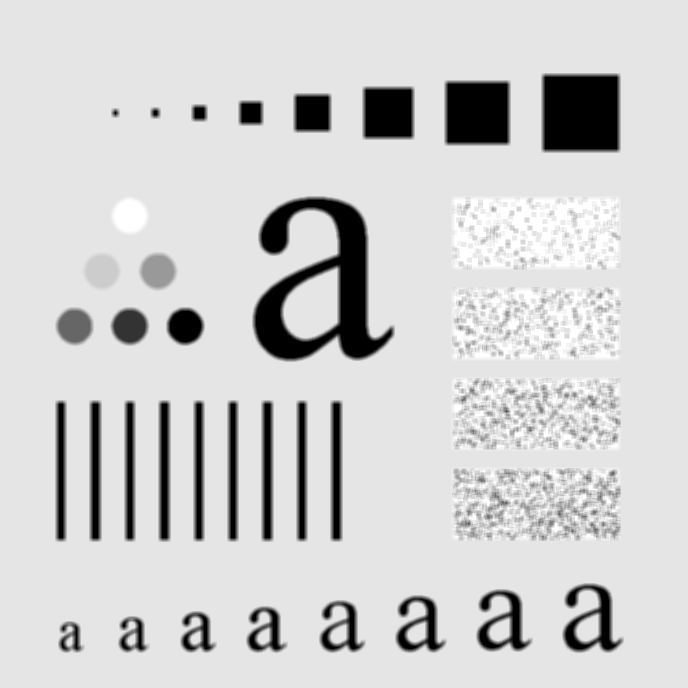

In [7]:
spatialfilter(img, arrayfilter )

In [8]:
filtersize  = 15
arrayfilter = np.ones((filtersize, filtersize)) * 1/(filtersize*filtersize)

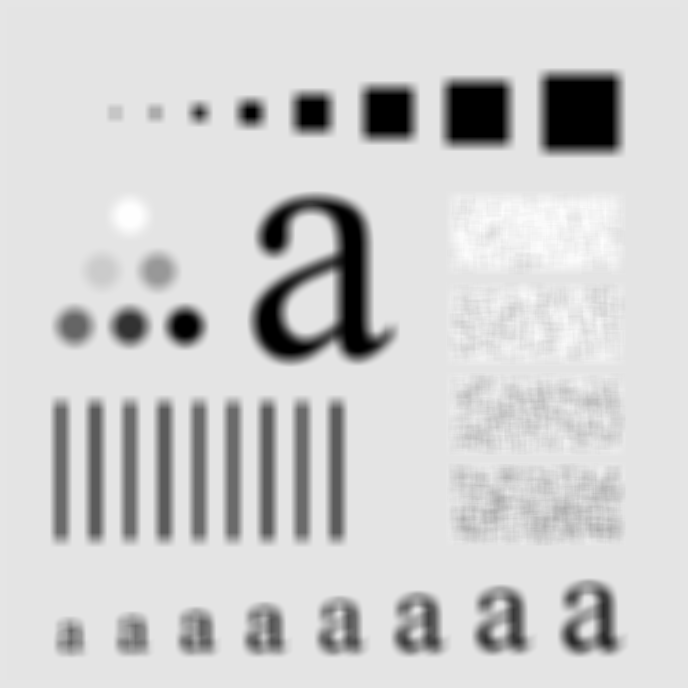

In [9]:
spatialfilter(img, arrayfilter )

In [10]:
filtersize  = 35
arrayfilter = np.ones((filtersize, filtersize)) * 1/(filtersize*filtersize)

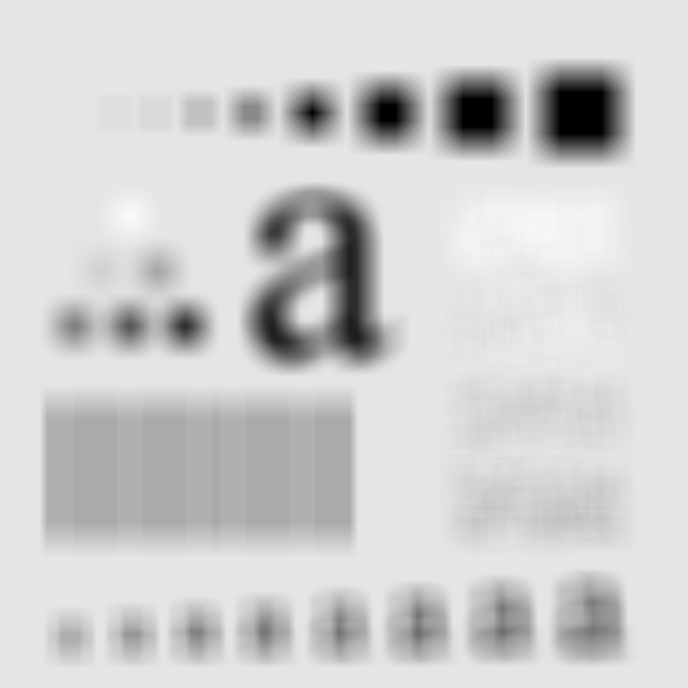

In [11]:
spatialfilter(img, arrayfilter )

### The output makes it clear that increasing the window size can both help and ruin the image